## Лабораторная работа №2

**Петров Кирилл**

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'font.size': 14})

### Задача №1

#### Постановка:
Рассмотрим математическую модель генной регулиризации - авторегрессор с задержкой. Эта система описывается уравнением :
$$
\dot x=\frac{\alpha}{1 + x_{\tau}^{n}} - x 
$$
Где $n$ - размерность белка, $\alpha > 0$, коэффициент синтеза, $x$ - концетрация белка в клетке, $x_{\tau}$ - концетрация с задержкой $\tau$. Состояние равновесия не изменяется с появлением задержки в уравнении, поэтому рассмотрим вопрос об устойчивости.

Для систем с задержкой вида $\dot x = f(x_\tau) + g(x)$ известно, что собственные числа имееют следующий вид:

$$
\begin{cases}
    \lambda _1=f'(x^*)e^{-\lambda _1\tau}cos(\lambda _2\tau) + g'(x^*) \\
    \lambda _2=-f'(x^*)e^{-\lambda _1\tau}sin(\lambda _2\tau) \\
\end{cases}
$$

Где $x^*$ - соостояние равновесия.

Система будет устойчивой, если $Re(\lambda _i) < 0$. И неустойчивой, если $Re(\lambda _i) > 0$.

В нашем случае $Re(\lambda _i = \lambda _1)$ и:
$$
f=\frac{\alpha}{1 + x_{\tau}^{n}}
$$
$$
g = -x
$$
$$
f'(x^*)=\frac{\alpha n{x^*}^{n-1}}{(1 + {x^*}^{n})^2} = -\beta
$$
$$
g'(x^*)=-1
$$

Тогда в нашем случае $\lambda _1$ и $\lambda _2$ имееют вид:

$$
\begin{cases}
    \lambda _1=-\beta e^{-\lambda _1\tau}cos(\lambda _2\tau) - 1 \\
    \lambda _2=\beta e^{-\lambda _1\tau}sin(\lambda _2\tau) \\
\end{cases}
$$

Найдем точки биффуркации, определив смену знака $\lambda _1$, отвечающего за устойчивость системы. При $\lambda_1 = 0$ выразим $\tau $:
$$
\begin{cases}
    -\beta cos(\lambda _2\tau) = 1 \\
    \lambda _2=\beta sin(\lambda _2\tau) \\
\end{cases}
\to
\begin{cases}
    \tau = \frac{1}{\lambda _2}arccos\big(-\frac{1}{\beta}\big) \\
    \lambda _2^2=\beta ^2 - 1
\end{cases}
$$

Для поиска $\tau$ нужно вычислить $\beta$, а для него требуется знать состояния равновесия $x^*$, которое мы можем найти численно с помощью метода Ньютона, как корень уравнения $ f(x) = x^{n+1} + x - \alpha $.

#### Задание:
1. При разных $n$ построить графики зависимости $\tau(\alpha)$.

#### Решение:

Для авторегрессора значение функции принимает значение: $ f(x) = x^{n+1} + x - \alpha $. А производная: $ f'(x) = (n+1)x^{n} + 1 $

In [2]:
class AutoRegressor:
    def __init__(self, alpha, n):
        self.alpha, self.n = alpha, n
        
    def value(self, x):
        return x**(self.n + 1) + x - self.alpha
    
    def derivative(self, x):
        return (self.n + 1) * x**self.n + 1.0

Метод Ньютона:
$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

Критерий остановки:

$$ \big|f(x_{n+1} - f(x_n)\big| < \epsilon $$

In [3]:
def newton(f, x0, max_iter = 1000, eps = 1e-8):
    x = x0
    path = []
    for it in range(max_iter):
        xn = x - f.value(x) / f.derivative(x)
        path.append(math.fabs(xn - x))
        if path[-1] <= eps:
            break
        x = xn
    return xn, path


Вычисление ${\tau}$ по формулам выведеным ранее:
$$
\begin{cases}
    \tau = \frac{1}{\lambda _2}arccos\big(-\frac{1}{\beta}\big) \\
    \lambda _2^2=\beta ^2 - 1 \\
     -\beta = \frac{\alpha n{x^*}^{n-1}}{(1 + {x^*}^{n})^2}
\end{cases}
$$

In [4]:
def get_tau(alpha, n, x):
    beta = alpha * n * x**(n - 1) / (1 + x**n)**2
    if beta < 1:
        return None
    inv_lambda_2 = 1.0 / math.sqrt(beta**2 - 1)
    return inv_lambda_2 * math.acos(1.0/beta)

При разных $n$ графики зависимости задержкт $\tau$ от параметра $\alpha$ при $n = \{2, 4, 6\}$ и $\alpha \in [0; 10]$.

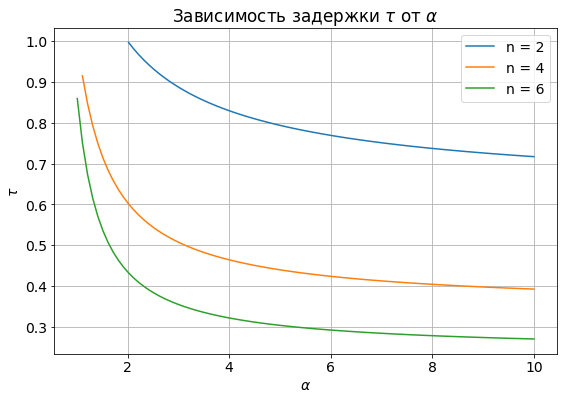

In [5]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

n_arr = [2, 4, 6]
alpha_arr = np.linspace(0.0, 10.0, 100)

for n in n_arr:
    tau_arr = []
    for alpha in alpha_arr:
        regressor = AutoRegressor(alpha, n)
        x, _ = newton(regressor, alpha)
        tau = get_tau(alpha, n, x)
        tau_arr.append(tau)
         
    ax.set_title(r'Зависимость задержки $\tau$ от $\alpha$')
    ax.plot(alpha_arr, tau_arr, label='n = {}'.format(n))
    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\tau$')

Область устойчивости расположена ниже кривых, изображенных на рисунке выше. Оболасть неустойчивости - выше. Система при отстутсвии задержек была устойчивой.